# **Chapter 5**

## **41. 데이터를 읽어 들이고 이용 데이터를 수정하자**

In [3]:
import pandas as pd
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

In [4]:
uselog_months

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [5]:
# 데이터 가공
# 미래 예측을 위해 그 달과 1개월 전의 이용 이력만으로 데이터 작성
year_months = list(uselog_months['연월'].unique())
uselog = pd.DataFrame()
# 이번 달과 1개월 전의 이용 횟수 집계
for i in range(1, len(year_months)):
  tmp = uselog_months.loc[uselog_months['연월']==year_months[i]]
  tmp.rename(columns={'count':'count_0'}, inplace=True)
  tmp_before = uselog_months.loc[uselog_months['연월']==year_months[i-1]]
  del tmp_before['연월']
  tmp_before.rename(columns={'count':'count_1'}, inplace=True)
  tmp = pd.merge(tmp, tmp_before, on='customer_id', how='left')
  uselog = pd.concat([uselog, tmp], ignore_index=True)
uselog.head()

<ipython-input-5-f9cb42dec98b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.rename(columns={'count':'count_0'}, inplace=True)
<ipython-input-5-f9cb42dec98b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={'count':'count_1'}, inplace=True)
<ipython-input-5-f9cb42dec98b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.rename(columns={'count':'count_0'}, inplace=True)
<ipython-input-5-f9cb42dec98b

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


## **42. 탈퇴 전월의 탈퇴 고객 데이터를 작성하자**

`end_date` column의 탈퇴 월이 아닌 탈퇴 전월의 데이터를 작성하는 이유:
* 탈퇴를 예측하는 목적 = 탈퇴를 미연에 방지하는 것
* (데이터 상 스포츠 센터에서는) 월말까지 탈퇴 신청을 해야 다음 달 말에 탈퇴 가능

In [28]:
# 탈퇴한 회원 추출
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer['is_deleted']==1]
exit_customer['exit_date'] = None
exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])
# end_date의 1개월 전을 계산하여 연월에 저장
for i in range(len(exit_customer)):
  exit_customer['exit_date'].iloc[i] = exit_customer['end_date'].iloc[i] - relativedelta(months=1)
exit_customer['연월'] = pd.to_datetime(exit_customer['exit_date']).dt.strftime("%Y-%m")
uselog['연월'] = uselog['연월'].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=['customer_id', '연월'], how='left')
print(len(uselog))
exit_uselog.head()

<ipython-input-28-b237a098fea0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['exit_date'] = None
<ipython-input-28-b237a098fea0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])
<ipython-input-28-b237a098fea0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

33851


<ipython-input-28-b237a098fea0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['exit_date'].iloc[i] = exit_customer['end_date'].iloc[i] - relativedelta(months=1)
<ipython-input-28-b237a098fea0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['exit_date'].iloc[i] = exit_customer['end_date'].iloc[i] - relativedelta(months=1)
<ipython-input-28-b237a098fea0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# 결합한 데이터는 탈퇴한 회원의 탈퇴 전월의 데이터뿐 → 결측치 많음
print(len(exit_uselog))

# 'name' 열에 결측치가 없는 데이터 출력
no_missing_values = exit_uselog[exit_uselog['name'].notna()]
print(len(no_missing_values))

# 모든 열에서 결측치가 없는 행을 출력
no_missing_values = exit_uselog.dropna()
print(no_missing_values)

33851
0
Empty DataFrame
Columns: [연월, customer_id, count_0, count_1, name, class, gender, start_date, end_date, campaign_id, is_deleted, class_name, price, campaign_name, mean, median, max, min, routine_flg, calc_date, membership_period, exit_date]
Index: []

[0 rows x 22 columns]


In [30]:
exit_uselog.head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
exit_uselog['name'].unique()

array([nan], dtype=object)

In [22]:
exit_uselog['name'].isnull().sum()

33851

In [23]:
exit_uselog['name'].isna().sum()

33851

In [32]:
# 결측치가 없는 데이터만 남기고 나머지 제거
exit_uselog = exit_uselog.dropna(subset=['name'])
print(len(exit_uselog))
print(len(exit_uselog['customer_id'].unique()))
#exit_uselog.head()

0
0


여기서 0이 나오는 이유:

`exit_uselog['name']`열의 모든 값이 `NaN`이기 때문에 `dropna()` 함수 실행 결과에 따라 **모든 행을 삭제**하게 되어 `exit_uselog`의 길이가 0이 되는 것이다.

→ ***확인 및 수정 필요!***

## **43. 지속 회원의 데이터를 작성하자**

In [33]:
conti_customer = customer.loc[customer['is_deleted']==0]
conti_uselog = pd.merge(uselog, conti_customer, on=['customer_id'], how='left')
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset=['name'])
print(len(conti_uselog))

33851
27422


`name` 칼럼의 결손 데이터를 제거하고 탈퇴 회원을 제거(33851→27422)한다.

In [34]:
# 데이터를 섞고 중복을 제거
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset='customer_id')
print(len(conti_uselog))
conti_uselog.head()

2842


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201903,OA846208,7,2.0,XXXXX,C03,M,2017-07-01,NaN,CA2,...,야간,6000.0,입회비반액할인,5.000000,5.0,8.0,2.0,1.0,2019-04-30,21.0
1,201810,OA162065,4,5.0,XXXX,C01,M,2016-07-01,NaN,CA2,...,종일,10500.0,입회비반액할인,4.250000,4.0,6.0,2.0,1.0,2019-04-30,33.0
2,201903,TS602789,7,8.0,XXXX,C02,M,2018-07-14,NaN,CA1,...,주간,7500.0,일반,7.666667,7.0,10.0,5.0,1.0,2019-04-30,9.0
3,201811,PL798417,5,9.0,XXXXX,C01,M,2018-02-01,NaN,CA1,...,종일,10500.0,일반,7.250000,7.0,10.0,5.0,1.0,2019-04-30,14.0
4,201810,HD736119,4,5.0,XXXXX,C01,M,2018-05-10,NaN,CA2,...,종일,10500.0,입회비반액할인,6.909091,7.0,9.0,4.0,1.0,2019-04-30,11.0


탈퇴 데이터의 수와 지속회원 데이터의 수가 맞지 않기 때문에 지속회원 데이터(27422개)를 모두 사용하는 것은 불균형한 데이터가 되어 버린다. 따라서, 지속 회원 데이터도 회원당 1개가 되도록 undersampling을 진행한다.

In [ ]:
# 지속회원 데이터와 탈퇴회원 데이터를 세로로 결합

# 탈퇴회원 데이터에 대한 수정이 필요하므로 추후에 수정 예정

## **44. 예측할 달의 재적 기간을 작성하자**

In [38]:
predict_data = pd.read_csv('predict_data.csv')
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,2018-10,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5
1,2018-10,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5
2,2018-10,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5
3,2018-10,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5
4,2018-10,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5


In [39]:
predict_data['period'] = 0
predict_data['now_date'] = pd.to_datetime(predict_data['연월'], format='%Y-%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])
for i in range(len(predict_data)):
  delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
  predict_data['period'][i] = int(delta.years*12 + delta.months)
predict_data.head()

Streaming output truncated to the last 5000 lines.
<ipython-input-39-4cf4ad11f869>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = int(delta.years*12 + delta.months)
<ipython-input-39-4cf4ad11f869>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = int(delta.years*12 + delta.months)
<ipython-input-39-4cf4ad11f869>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['perio

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,2018-10,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5
1,2018-10,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5
2,2018-10,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5
3,2018-10,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5
4,2018-10,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5


## **45. 결측치를 제거하자**

In [41]:
predict_data.isnull().sum()

,0
연월,0
customer_id,0
count_pred,0
count_0,0
count_1,0
count_2,0
count_3,0
count_4,0
count_5,0
start_date,0


# **Chapter 6**

## **51. 물류 데이터를 불러오자**

In [42]:
import pandas as pd

# 데이터 프레임 형식으로 불러오기
factories = pd.read_csv('tbl_factory.csv', index_col=0)
warehouses = pd.read_csv('tbl_warehouse.csv', index_col=0)
cost = pd.read_csv('rel_cost.csv', index_col=0)
trans = pd.read_csv('tbl_transaction.csv', index_col=0)

In [43]:
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [46]:
warehouses

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,판교창고,35,북부
WH00002,용인창고,41,북부
WH00003,수원창고,42,북부
WH00004,대전창고,60,남부
WH00005,대구창고,72,남부
WH00006,광주창고,65,남부


In [44]:
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [45]:
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [47]:
join_data = pd.merge(trans, cost, left_on=['ToFC','FromWH'], right_on=['FCID', 'WHID'], how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


`how='left'` : 왼쪽 데이터프레임의 모든 행을 유지하고, 오른쪽 데이터프레임에서 일치하는 데이터를 병합한다.

In [48]:
# 결합한 데이터에 공장 데이터 추가
join_data = pd.merge(join_data, factories, left_on='ToFC', right_on='FCID', how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부


In [49]:
join_data = pd.merge(join_data, warehouses, left_on='FromWH', right_on='WHID', how='left')
# 칼럼 순서 정렬
join_data = join_data[['TransactionDate','Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부


In [50]:
# 북부지사에 해당하는 데이터만 추출
north = join_data.loc[join_data['WHRegion']=='북부']
north.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부


In [51]:
# 남부지사에 해당하는 데이터만 추출
south = join_data.loc[join_data['WHRegion']=='남부']
south.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부


## **52. 현재 운송량과 비용을 확인해보자**

In [52]:
# 운송 실적 총 이용 집계
print('북부지사 총 비용: ' + str(north['Cost'].sum()) + '만원')
print('남부지사 총 비용: ' + str(south['Cost'].sum()) + '만원')

북부지사 총 비용: 2189.3만원
남부지사 총 비용: 2062.0만원


In [53]:
# 운송 부품 개수 집계
print('북부지사의 총 부품 운송개수: ' + str(north['Quantity'].sum()) + '개')
print('남부지사의 총 부품 운송개수: ' + str(south['Quantity'].sum()) + '개')

북부지사의 총 부품 운송개수: 49146개
남부지사의 총 부품 운송개수: 50214개


In [54]:
# 운송 부품 1개당 운송 비용
tmp = (north['Cost'].sum() / north['Quantity'].sum())*10000
print('북부지사의 부품 1개당 운송 비용: ' + str(int(tmp)) + '원')
tmp = (south['Cost'].sum() / south['Quantity'].sum())*10000
print('남부지사의 부품 1개당 운송 비용: ' + str(int(tmp)) + '원')

북부지사의 부품 1개당 운송 비용: 445원
남부지사의 부품 1개당 운송 비용: 410원


In [55]:
# 각 지사의 평균 운송 비용
cost_chk = pd.merge(cost, factories, on='FCID', how='left')
print('북부지사의 평균 운송 비용: ' + str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='북부'].mean()) + '원')
print('남부지사의 평균 운송 비용: ' + str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='남부'].mean()) + '원')

북부지사의 평균 운송 비용: 1.075원
남부지사의 평균 운송 비용: 1.05원


각 지사의 평균 운송 비용은 거의 같으므로 북부지사보다 남부지사가 '효율 높게' 부품을 운송하고 있다는 것을 알 수 있다.

## **53. 네트워크를 가시화해보자**

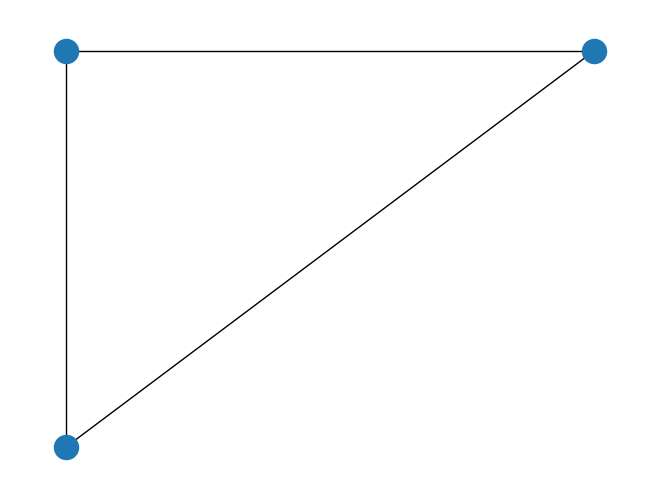

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 객체 생성
G=nx.Graph()

# 노드 설정
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

# 엣지 설정
G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')

# 좌표 설정
pos={}
pos['nodeA']=(0,0)
pos['nodeB']=(1,1)
pos['nodeC']=(0,1)

# 그리기
nx.draw(G, pos)

# 표시
plt.show()

1. 그래프 객체를 선언
2. 노드와 각각을 연결할 엣지를 설정
3. 노드의 좌표를 설정하고 함수 `draw`를 이용하여 그리기

흐름으로 네트워크를 가시화해서 창고에서 대리점까지의 물류를 표현 가능.

## **54. 네트워크에 노드를 추가해보자**

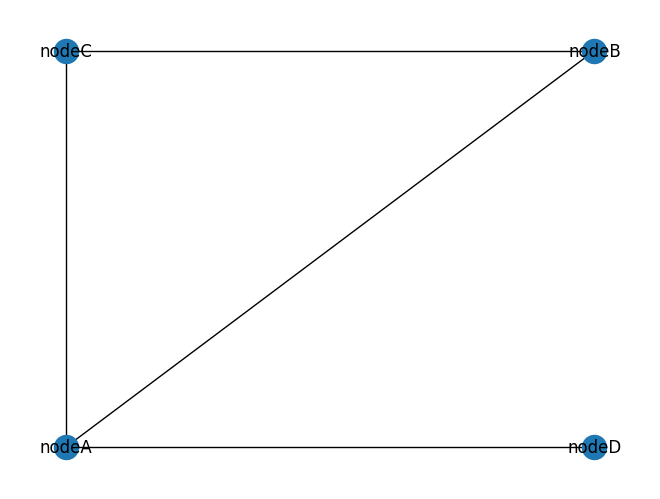

In [57]:
# 작성한 네트워크 바꿔보기
G.add_node('nodeD')
G.add_edge('nodeA', 'nodeD')
pos['nodeD']=(1,0)

nx.draw(G, pos, with_labels=True)

## **55. 경로에 가중치를 부여하자**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [59]:
# 가중치 정보에 대한 데이터 불러오기
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

In [60]:
df_w.head()

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [61]:
df_p.head()

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [63]:
# 엣지 가중치 리스트화
size = 10
edge_weights = []
for i in range(len(df_w)):
  for j in range(len(df_w.columns)):
    edge_weights.append(df_w.iloc[i][j]*size)

print(edge_weights)

[6.39921, 1.4335300000000002, 9.44669, 5.21848, 0.0, 2.64556, 0.0, 4.5615, 5.68434, 0.0, 6.17635, 6.12096, 6.16934, 9.43748, 0.0, 0.0, 0.0, 6.97631, 0.60225, 6.66767, 6.706379999999999, 2.10383, 0.0, 3.15428, 0.0]


<ipython-input-63-c6aab2897790>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edge_weights.append(df_w.iloc[i][j]*size)


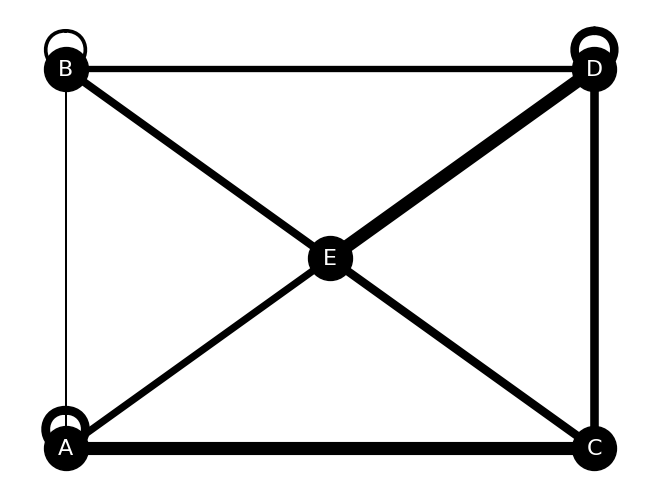

In [64]:
# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
for i in range(len(df_w.columns)):
  G.add_node(df_w.columns[i])

# 엣지 설정
for i in range(len(df_w.columns)):
  for j in range(len(df_w.columns)):
    G.add_edge(df_w.columns[i], df_w.columns[j])

# 좌표 설정
pos = {}
for i in range(len(df_w.columns)):
  node = df_w.columns[i]
  pos[node] = (df_p[node][0], df_p[node][1])

# 그리기
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k',
        font_color='w', width=edge_weights)

# 표시
plt.show()

`draw` 함수를 그릴 때, `width=edge_widths`로 지정함으로써 가중치를 적용한 엣지를 그릴 수 있다.

## **56. 운송 경로 정보를 불러오자**



*   `trans_route.csv` : 운송 경로
*   `trans_route_pos.csv` : 창고 및 공장의 위치 정보
*   `trans_cost.csv` : 창고와 공장 간의 운송 비용
*   `demand.csv` : 공장의 제품 생산량에 대한 수요
*   `supply.csv` : 창고가 공급 가능한 최대 부품 수
*   `trans_route_new.csv` : 새로 설계한 운송 경로



In [65]:
# 운송 경로 데이터 불러오기
df_tr = pd.read_csv('trans_route.csv', index_col='공장')
df_tr.head()

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


## **57. 운송 경로 정보로 네트워크를 가시화해보자**

In [69]:
# 창고 및 공장의 위치 정보 데이터
df_pos = pd.read_csv('trans_route_pos.csv')
print(df_pos.columns)
df_pos.head()

Index(['W1', 'W2', 'W3', 'F1', 'F2', 'F3', 'F4'], dtype='object')


,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


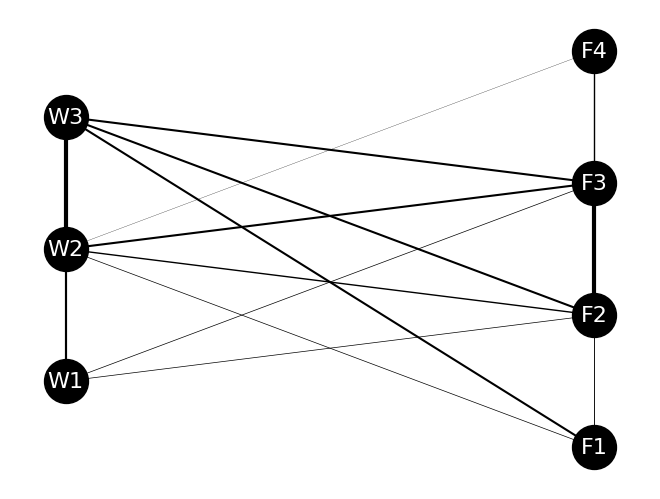

In [71]:
# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
for i in range(len(df_pos.columns)):
  G.add_node(df_pos.columns[i])

# 엣지 설정 및 가중화 리스트화
num_pre = 0
edge_weights = []
size=0.1
for i in range(len(df_pos.columns)):
  for j in range(len(df_pos.columns)):
    if not (i==j):
      G.add_edge(df_pos.columns[i], df_pos.columns[j])
      # 엣지 가중치 추가
      if num_pre < len(G.edges):
        num_pre = len(G.edges)
        weight=0
        if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
          if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
            weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
        elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
          if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
            weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
          edge_weights.append(weight)

# 좌표 설정
pos={}
for i in range(len(df_pos.columns)):
  node = df_pos.columns[i]
  pos[node] = (df_pos[node][0], df_pos[node][1])

# 그리기
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

# 표시
plt.show()

왼쪽에 창고 `W1`, `W2`, `W3`를 오른쪽에는 공장 `F1`, `F2`, `F3`, `F4`.

엣지 설정과 엣지의 가중치 작성을 동시에 진행 → 엣지의 수와 엣지의 가중치 수가 달라지지 않도록 하기 위해!

**네트워크을 보면, 어떤 창고와 어떤 공장 사이에 많은 운송이 이루어지는지 파악 가능.**


운송 비용을 생각하면 운송 경로는 어느 정도 집중되는 편이 효율이 높을 것!

## **58. 운송 비용 함수를 작성하자**

In [73]:
# 운송 경로 정보
df_tr = pd.read_csv('trans_route.csv', index_col='공장')
# 각 운송 경로에 필요한 비용에 대한 정보
df_tc = pd.read_csv('trans_cost.csv', index_col='공장')

In [75]:
# 운송 비용 함수
def trans_cost(df_tr, df_tc):
  cost = 0
  for i in range(len(df_tc.index)):
    for j in range(len(df_tr.columns)):
      # 운송 비용 계산 = 운송 경로의 (운송량)*(비용)
      cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
  return cost

print('총 운송 비용: ' + str(trans_cost(df_tr, df_tc)) + '만원')

총 운송 비용: 1493만원


<ipython-input-75-90152d3a12eb>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]


## **59. 제약 조건을 만들어보자**

In [76]:
# 공급 가능한 부품 수
df_demand = pd.read_csv('demand.csv')
# 공장이 채워야 할 최소한의 제품 제조량
df_supply = pd.read_csv('supply.csv')

In [86]:
df_demand.head()

,F1,F2,F3,F4
0,28,29,31,25


In [87]:
df_supply.head()

,W1,W2,W3
0,35,41,42


In [78]:
# 수요측 제약 조건
for i in range(len(df_demand.columns)):
  temp_sum = sum(df_tr[df_demand.columns[i]])
  print(str(df_demand.columns[i]) + '으로 운송량: ' + str(temp_sum) + ' (수요량: ' + str(df_demand.iloc[0][i]) + ")")
  if temp_sum >= df_demand.iloc[0][i]:
    print('수요량을 만족시키고 있음')
  else:
    print('수요량을 만족시키지 못하고 있음. 운송경로 재계산 필요')

F1으로 운송량: 30 (수요량: 28)
수요량을 만족시키고 있음
F2으로 운송량: 30 (수요량: 29)
수요량을 만족시키고 있음
F3으로 운송량: 32 (수요량: 31)
수요량을 만족시키고 있음
F4으로 운송량: 25 (수요량: 25)
수요량을 만족시키고 있음


<ipython-input-78-9c9bf722e339>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(str(df_demand.columns[i]) + '으로 운송량: ' + str(temp_sum) + ' (수요량: ' + str(df_demand.iloc[0][i]) + ")")
<ipython-input-78-9c9bf722e339>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if temp_sum >= df_demand.iloc[0][i]:


In [80]:
print(df_demand.columns)
print(df_supply.columns)

Index(['F1', 'F2', 'F3', 'F4'], dtype='object')
Index(['W1', 'W2', 'W3'], dtype='object')


In [85]:
# 공급측 제약 조건
for i in range(len(df_supply.columns)):
  temp_sum = sum(df_tr.loc[df_supply.columns[i]])
  print(str(df_supply.columns[i]) + ' 부터의 운송량: ' + str(temp_sum) + ' (공급한계: ' + str(df_supply.iloc[0][i]) + ')')
  if temp_sum <= df_supply.iloc[0][i]:
    print('공급한계 범위 내')
  else:
    print('공급한계 초과. 운송경로 재계산 필요')

W1 부터의 운송량: 35 (공급한계: 35)
공급한계 범위 내
W2 부터의 운송량: 40 (공급한계: 41)
공급한계 범위 내
W3 부터의 운송량: 42 (공급한계: 42)
공급한계 범위 내


<ipython-input-85-6af361e7ed18>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(str(df_supply.columns[i]) + ' 부터의 운송량: ' + str(temp_sum) + ' (공급한계: ' + str(df_supply.iloc[0][i]) + ')')
<ipython-input-85-6af361e7ed18>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if temp_sum <= df_supply.iloc[0][i]:


현재 운송 경로가 제약 조건을 모두 만족.

## **60. 운송 경로를 변경해서 운송 비용 함수의 변화를 확인하자**

In [88]:
# W2에서 F4로의 운송으로 보충하게 변경한 새로운 경로가 저장된 데이터
df_tr_new = pd.read_csv('trans_route_new.csv', index_col='공장')
print(df_tr_new)

    F1  F2  F3  F4
공장                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15


In [90]:
# 총 운송 비용 재계산
print('총 운송 비용(변경 후): ' + str(trans_cost(df_tr_new, df_tc)) + '만원')

총 운송 비용(변경 후): 1428만원


<ipython-input-75-90152d3a12eb>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]


In [91]:
# 제약 조건 계산 함수
# 수요측
def condition_demand(df_tr, df_demand):
  flag = np.zeros(len(df_demand.columns))
  for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    if (temp_sum >= df_demand.iloc[0][i]):
      flag[i] = 1
  return flag

# 공급측
def condition_supply(df_tr, df_supply):
  flag = np.zeros(len(df_supply.columns))
  for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    if temp_sum <= df_supply.iloc[0][i]:
      flag[i] = 1
  return flag

In [92]:
print('수요조건 계산 결과: ' + str(condition_demand(df_tr_new, df_demand)))
print('공급조건 계산 결과: ' + str(condition_supply(df_tr_new, df_supply)))

수요조건 계산 결과: [1. 1. 1. 1.]
공급조건 계산 결과: [1. 0. 1.]


<ipython-input-91-4db63f32e25c>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (temp_sum >= df_demand.iloc[0][i]):
<ipython-input-91-4db63f32e25c>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if temp_sum <= df_supply.iloc[0][i]:
